## House Price Prediction Model

The aim of this project is to be able to create a Machine Learning Model based on Regression which can predict the prices of houses based on some inputs common to almost all house-holds.


### Importing dataset and understanding it:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
home = pd.read_csv("Housing.csv")

In [3]:
home

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [6]:
home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [10]:
home.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Therefore, there are no missing values existing in the dataset.

In [4]:
home.replace({"yes":1, "no":0}, inplace=True)
home

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


### Exploratory Data Analysis (EDA):

In [11]:
home.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


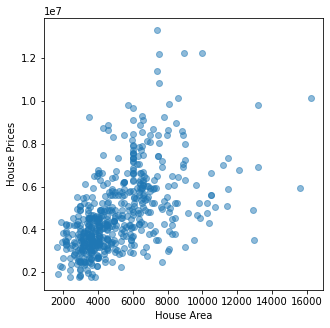

In [37]:
plt.figure(figsize=(5,5))
plt.scatter(home["area"], home["price"], alpha=0.5)
plt.xlabel("House Area")
plt.ylabel("House Prices")
plt.show()

From the above plot, we can see that 'parking' may not have a great impact on the prices of houses. However, it may affect the price initially. Therefore, checking for correlation between 'Parking' and 'House Prices'.

In [39]:
num_values = ["area", "bedrooms", "bathrooms", "stories", "parking"]
home[num_values].corr()

,area,bedrooms,bathrooms,stories,parking
area,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.352980,0.139270,0.177496,0.045547,1.000000


In [43]:
new = home.groupby("bedrooms")[["price"]].agg({
    "price":"median",
#     "price":"count"
})
theta_1 = ((np.mean(new.index)-new.index)*(new["price"].mean()-new["price"])).sum()/((new["price"].mean()-new["price"])**2).sum()
theta_0 = np.mean(new.index) - (theta_1*new["price"].mean())
print("Coefficient/Slope: ", theta_1)
print("Intercept: ", theta_0)
y_hat = theta_0 + theta_1*new["price"]

Coefficient/Slope:  1.4507016530752732e-06
Intercept:  -2.9052104737406


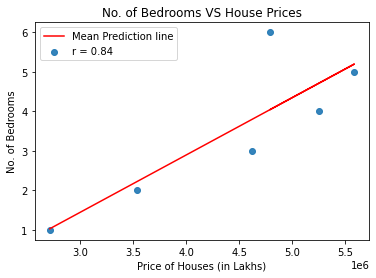

In [44]:
r = np.corrcoef(new.index, new["price"])[0,1]
plt.scatter(new, new.index, alpha=0.9, label=f"r = {r:0.2f}")
plt.plot(new["price"], y_hat, color="red", label="Mean Prediction line")
plt.xlabel("Price of Houses (in Lakhs)")
plt.ylabel("No. of Bedrooms")
plt.legend(loc=2)
plt.title("No. of Bedrooms VS House Prices")
plt.show()

Now, checking relations of price with other values:

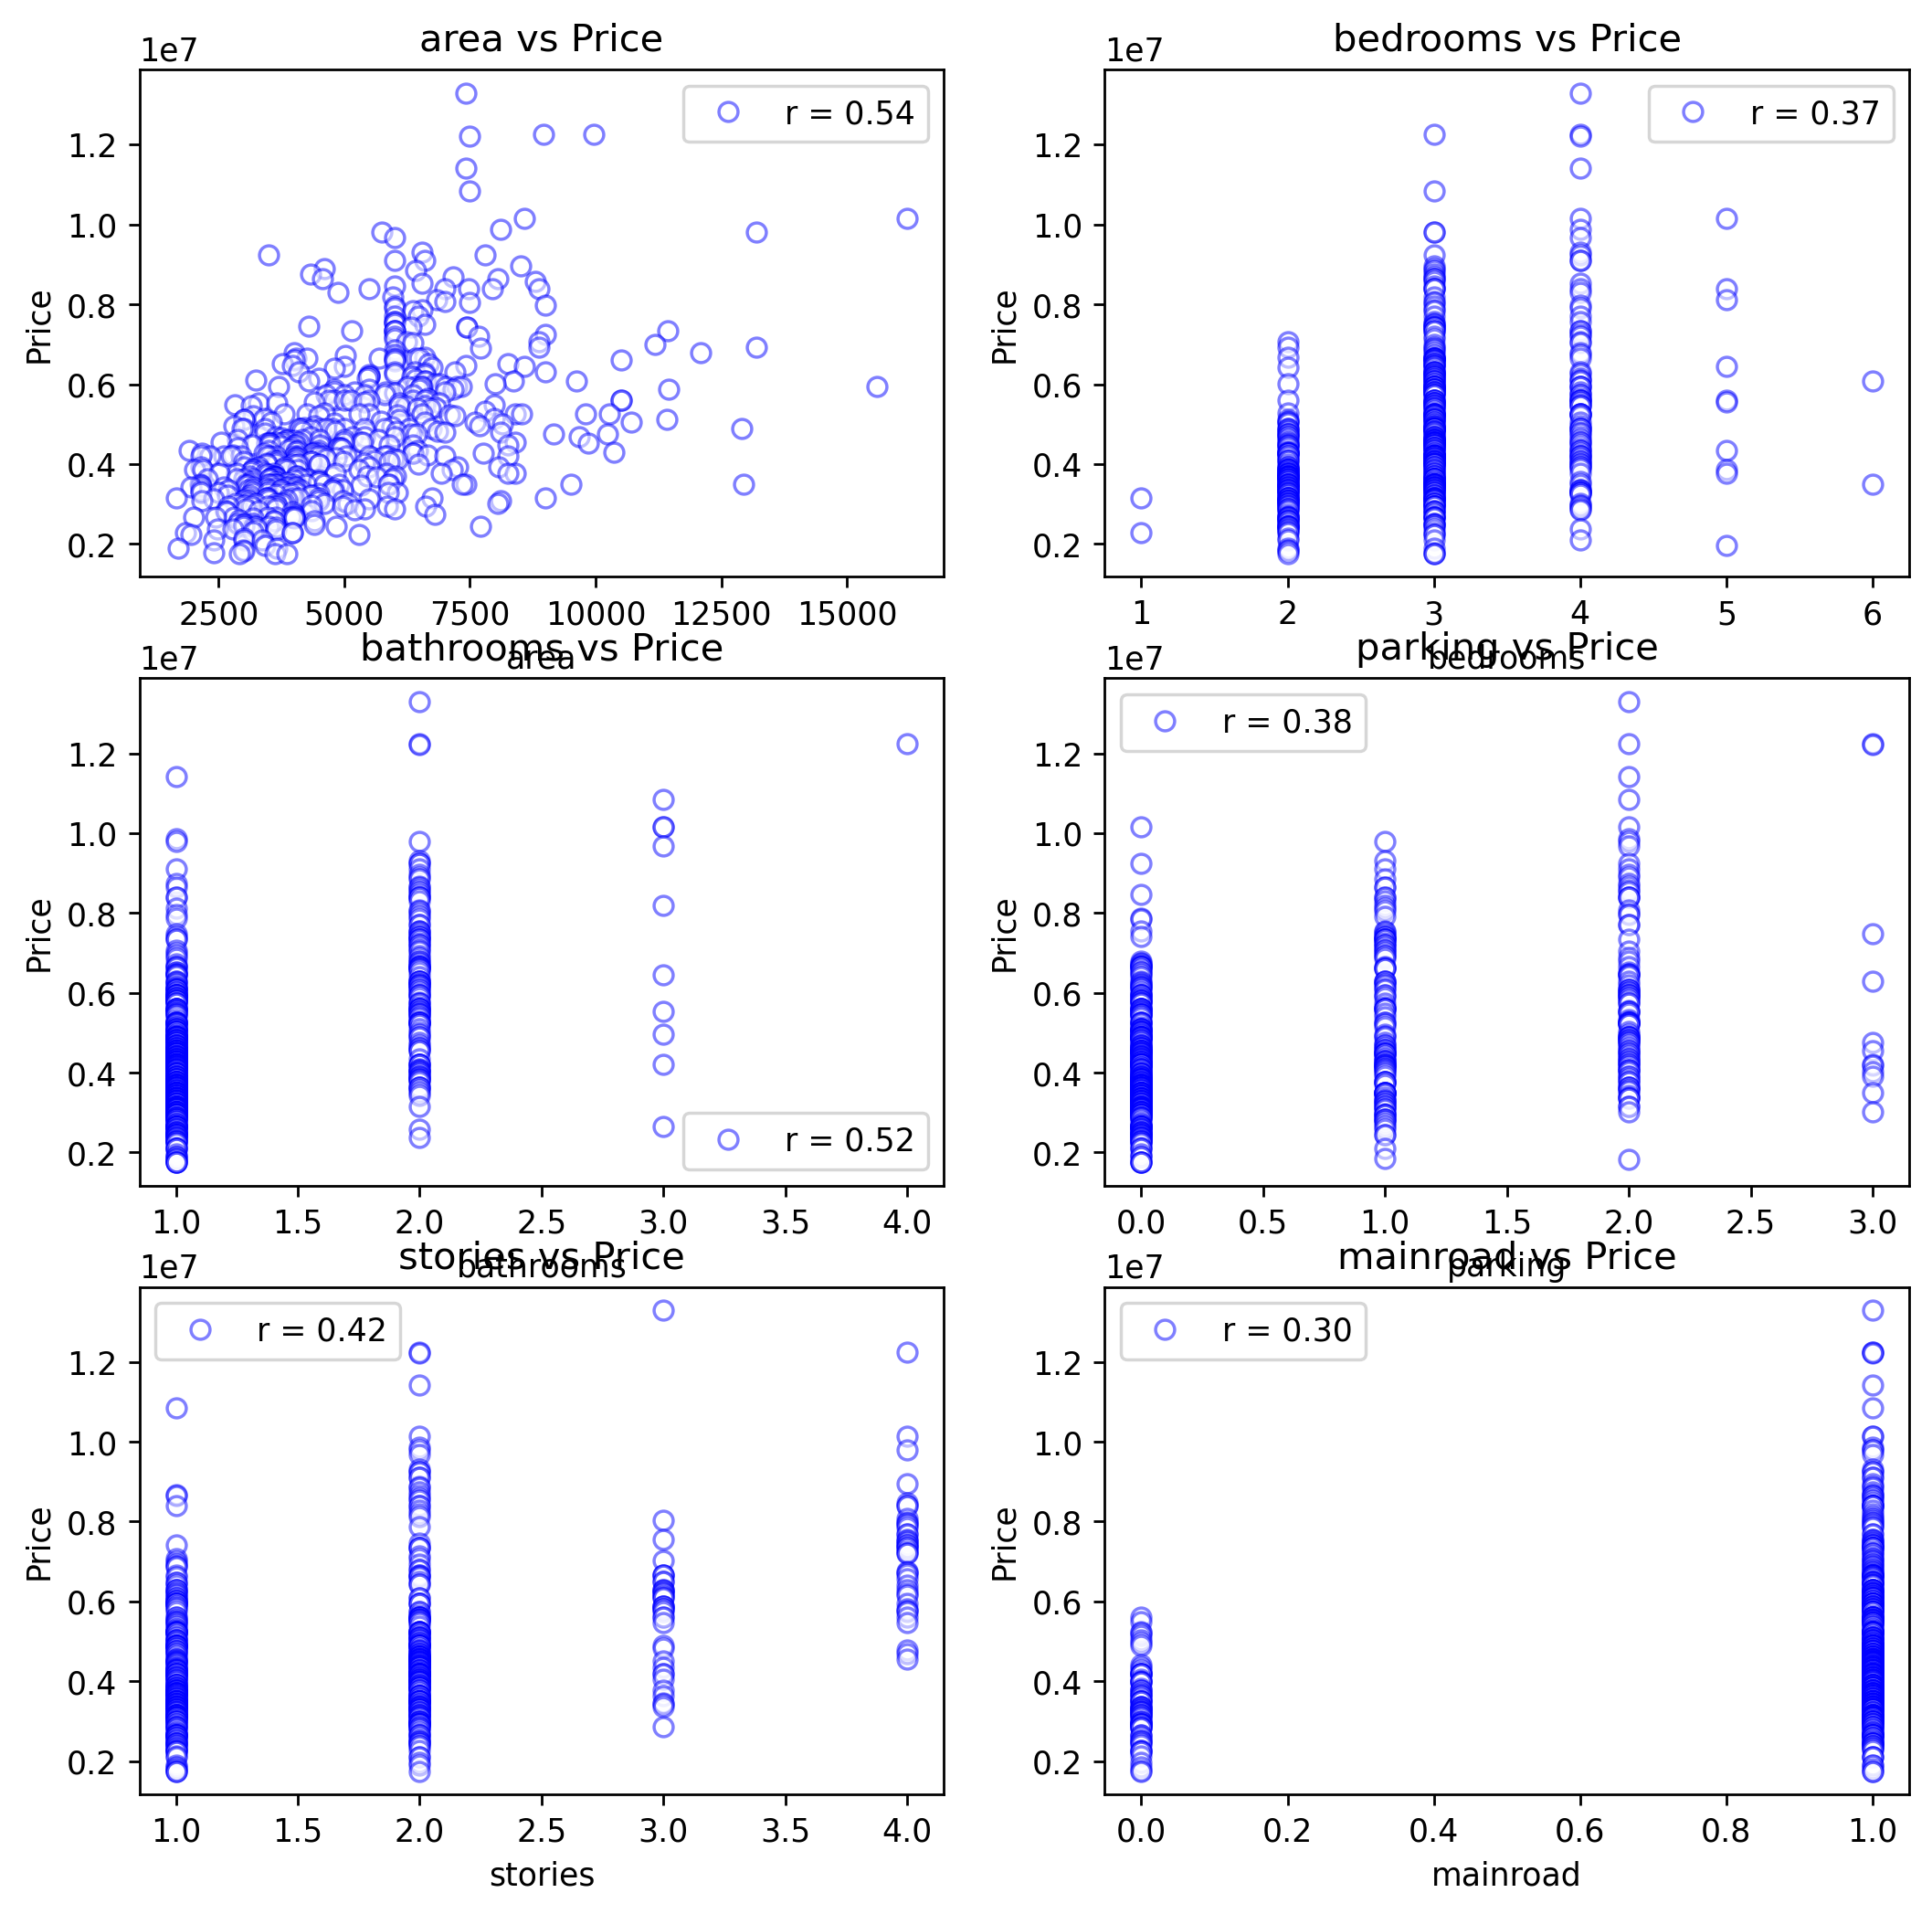

In [47]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, 
                                             figsize=(10, 10), dpi=250)

seq = zip(
    ["area", "bedrooms", "bathrooms", "parking", "stories", "mainroad"],
    [ax1,     ax2,        ax3,         ax4, ax5, ax6])

for column, ax in seq:
    r = np.corrcoef(home[column], home["price"])[0, 1]
    ax.plot(home[column], home["price"], "bo", label=f"r = {r:0.2f}", mfc='white', alpha=0.5)
    ax.set_title(f"{column} vs Price")
    ax.set_xlabel(column)
    ax.set_ylabel("Price")
    ax.legend()

plt.show()

We can observe clearly from the plots that in the plot 'bedrooms VS Price', the demand for 5 and 6 bedroom houses is lesser in comparison to 2, 3 and 4 bedroom houses.

Also, from the 'bathrooms VS Price' plot, we can infer that the demand for 1 and 2 bathroom houses is significantly more with respect to 3 and 4 bathroom houses.

Since the correlation of Price and Parking is approximately near 0.38, we can ignore this parameter for now in the process of determining important parameters since it does not seem to have a huge impact on the Price of the houses.

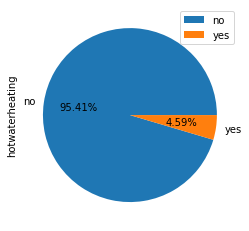

In [78]:
home.groupby("hotwaterheating")[["hotwaterheating"]].count().plot(kind="pie", autopct="%0.2f%%", subplots=True)
plt.show()

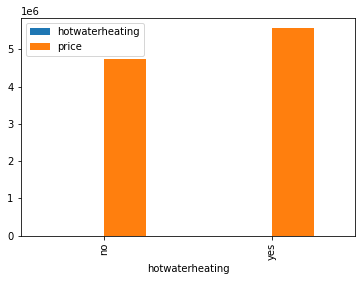

,hotwaterheating,price
hotwaterheating,,
no,520,4.728593e+06
yes,25,5.559960e+06


In [85]:
home.groupby("hotwaterheating")[["hotwaterheating", "price"]].agg({
    "hotwaterheating":"count",
    "price":"mean"
}).plot(kind="bar")
plt.show()
home.groupby("hotwaterheating")[["hotwaterheating", "price"]].agg({
    "hotwaterheating":"count",
    "price":"mean"
})

Since, there is not much difference between the prices of houses with and without the hot-water-heating facility, we are ignoring this feature for now.

Text(0, 0.5, 'House Prices (in ten-lakhs)')

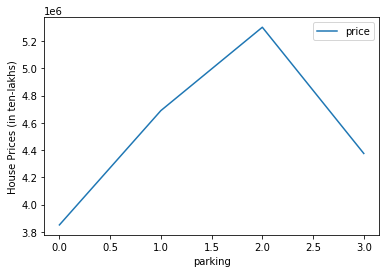

In [4]:
home.groupby("parking")[["price"]].median().plot()
plt.ylabel("House Prices (in ten-lakhs)")
# home.groupby("bathrooms")[["price"]].median()

Text(0, 0.5, 'House Prices (in ten-lakhs)')

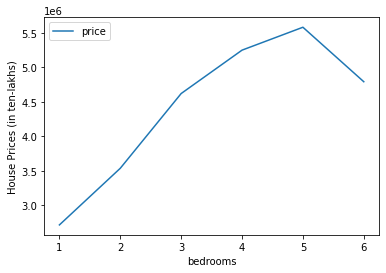

In [5]:
home.groupby("bedrooms")[["price"]].median().plot()
plt.ylabel("House Prices (in ten-lakhs)")
# home.groupby("bathrooms")[["price"]].median()

In [5]:
X = home.drop('price', axis=1)
y = home['price']

In [33]:
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [34]:
y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

In [75]:
X.shape[0]*0.20

109.0

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=45, test_size=0.15)

In [77]:
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
527,1836,2,1,1,0,0,1,0,0,0,0,semi-furnished
39,6000,4,2,4,1,0,0,0,1,1,0,semi-furnished
172,8400,3,1,2,1,1,1,0,1,2,1,unfurnished
145,5000,3,1,4,1,0,0,0,0,0,0,furnished
76,6420,3,2,3,1,0,0,0,1,0,1,furnished


In [78]:
y_train.head()

527    2275000
39     7910000
172    5250000
145    5600000
76     6650000
Name: price, dtype: int64

In [79]:
X_test.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
510,2880,3,1,1,0,0,0,0,0,0,0,unfurnished
179,3180,3,2,2,1,0,0,0,0,2,0,semi-furnished
482,3150,3,1,2,0,0,0,0,0,0,0,unfurnished
342,7152,3,1,2,1,0,0,0,1,0,0,furnished
491,2640,2,1,1,0,0,0,0,0,1,0,furnished


In [80]:
y_test.head()

510    2520000
179    5215000
482    2940000
342    3850000
491    2835000
Name: price, dtype: int64

In [41]:
X_train.corrwith(y_train)

area               0.552620
bedrooms           0.352927
bathrooms          0.534521
stories            0.414653
mainroad           0.298591
guestroom          0.245029
basement           0.180797
hotwaterheating    0.074685
airconditioning    0.465286
parking            0.382593
prefarea           0.325188
dtype: float64

In [81]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def rmse(y, y_hat):
    return np.sqrt(mean_squared_error(y, y_hat))

In [83]:
num_values = ['area','bedrooms', 'bathrooms', 'stories', 'mainroad', 'airconditioning']
nom_values = ['furnishingstatus']

In [82]:
numerical_pipeline = Pipeline([ ('imputer', SimpleImputer()), ('std scaler', StandardScaler())])
nominal_pipeline = Pipeline([('one hot encoding', OneHotEncoder())])

In [84]:
pipeline = ColumnTransformer([
    ('numerical pipeline', numerical_pipeline, num_values), # bedrooms, bathrooms, stories, mainroad, airconditioning, prefarea
    ('nominal pipeline', nominal_pipeline, nom_values) # furnished, semi-furnished, unfurnished.
])
output_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'airconditioning',
               'furnished', 'semi-furnished', 'unfurnished']

In [85]:
X_train_tr = pipeline.fit_transform(X_train)
X_train_tr = pd.DataFrame(X_train_tr, columns=output_cols)
X_train_tr.head()

,area,bedrooms,bathrooms,stories,mainroad,airconditioning,furnished,semi-furnished,unfurnished
0,-1.589842,-1.305255,-0.583438,-0.927224,-2.519763,-0.688856,0.0,1.0,0.0
1,0.406205,1.386651,1.417538,2.507214,0.396863,1.451683,0.0,1.0,0.0
2,1.556664,0.040698,-0.583438,0.217589,0.396863,1.451683,0.0,0.0,1.0
3,-0.073153,0.040698,-0.583438,2.507214,0.396863,-0.688856,1.0,0.0,0.0
4,0.607535,0.040698,1.417538,1.362401,0.396863,1.451683,1.0,0.0,0.0


In [86]:
X_test_tr = pipeline.fit_transform(X_test)
X_test_tr = pd.DataFrame(X_test_tr, columns = output_cols)
X_test_tr.head()

,area,bedrooms,bathrooms,stories,mainroad,airconditioning,furnished,semi-furnished,unfurnished
0,-0.874573,0.086555,-0.498729,-0.944039,-2.203893,-0.624364,0.0,0.0,1.0
1,-0.758421,0.086555,1.448690,0.265511,0.453743,-0.624364,0.0,1.0,0.0
2,-0.770036,0.086555,-0.498729,0.265511,-2.203893,-0.624364,0.0,0.0,1.0
3,0.779423,0.086555,-0.498729,0.265511,0.453743,1.601630,1.0,0.0,0.0
4,-0.967494,-1.332946,-0.498729,-0.944039,-2.203893,-0.624364,1.0,0.0,0.0


In [87]:
model = LinearRegression()
model.fit(X_train_tr, y_train)
print(model.intercept_, model.coef_)

4788207.979701729 [ 662257.63205877  149716.79488094  587207.7510609   240296.63238785
  212537.0010838   447165.15585565  279676.77939641  127389.4262146
 -407066.20561102]


In [88]:
def generate_models_report(models, X_train_tr, y_train, X_test_tr, y_test):
    width=116
    print('_'*width)
    title = "|{:^30}|{:^20}|{:^20}|{:^20}|{:^20}|"
    print(title.format("Model Name", "Train Error", "Test Error", "Train Accuracy", "Test Accuracy"))
    print(width*'_')
    row = "|{:^30}|{:^20.2f}|{:^20.2f}|{:^20.2f}|{:^20.2f}|"
    for model in models:
        model.fit(X_train_tr, y_train)
        y_hat_train = model.predict(X_train_tr)
        y_hat_test = model.predict(X_test_tr)
        train_error = rmse(y_train, y_hat_train)
        test_error = rmse(y_test, y_hat_test)
        train_accuracy = r2_score(y_train, y_hat_train)
        test_accuracy = r2_score(y_test, y_hat_test)
        model_name = str(model)
        print(row.format(model_name, train_error, test_error, train_accuracy*100, test_accuracy*100))
        print("-"*width)

In [89]:
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
models = [LinearRegression(), SGDRegressor(), SVR(), DecisionTreeRegressor(), RandomForestRegressor()]
generate_models_report(models, X_train_tr, y_train, X_test_tr, y_test)

____________________________________________________________________________________________________________________
|          Model Name          |    Train Error     |     Test Error     |   Train Accuracy   |   Test Accuracy    |
____________________________________________________________________________________________________________________
|      LinearRegression()      |     1138773.03     |     1227983.66     |       63.40        |       52.74        |
--------------------------------------------------------------------------------------------------------------------
|        SGDRegressor()        |     1138941.91     |     1225473.84     |       63.39        |       52.93        |
--------------------------------------------------------------------------------------------------------------------
|            SVR()             |     1934564.88     |     1813273.60     |       -5.64        |       -3.05        |
----------------------------------------------------------------

We can see that for the linear Regression model, the training and test accuracy is quite low due to which we can now try hyper-parameter tuning in an attempt to increase the **Train** and **Test Accuracy**. 

Adding parameters like `parking` and `guestroom`, `basement`, `hotwaterheating` and `prefarea` to check if the Accuracy goes up or not.

In [90]:
num_values = ['area','bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning','parking','prefarea']
nom_values = ['furnishingstatus']
pipeline = ColumnTransformer([
    ('numerical pipeline', numerical_pipeline, num_values),
    ('nominal pipeline', nominal_pipeline, nom_values)
])
output_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom','basement', 'hotwaterheating', 'airconditioning','parking','prefarea',
               'furnished', 'semi-furnished', 'unfurnished']
X_train_tr = pipeline.fit_transform(X_train)
X_train_tr = pd.DataFrame(X_train_tr, columns=output_cols)
X_test_tr = pipeline.fit_transform(X_test)
X_test_tr = pd.DataFrame(X_test_tr, columns = output_cols)
models = [LinearRegression(), SGDRegressor(), SVR(), DecisionTreeRegressor(), RandomForestRegressor()]
generate_models_report(models, X_train_tr, y_train, X_test_tr, y_test)

____________________________________________________________________________________________________________________
|          Model Name          |    Train Error     |     Test Error     |   Train Accuracy   |   Test Accuracy    |
____________________________________________________________________________________________________________________
|      LinearRegression()      |     1043699.98     |     1105466.22     |       69.25        |       61.70        |
--------------------------------------------------------------------------------------------------------------------
|        SGDRegressor()        |     1043725.16     |     1104451.18     |       69.25        |       61.77        |
--------------------------------------------------------------------------------------------------------------------
|            SVR()             |     1934566.67     |     1813273.74     |       -5.64        |       -3.05        |
----------------------------------------------------------------

Here, we can see that for `Linear Regression`, the Train and Test Accuracy has increased to 69.25% and 61.7% respectively. We can try out more combinations to be able to gain higher accuracy.

Another way can be to ignore the `parking`, `basement` and the `furniturestatus`:

In [91]:
num_values = ['area','bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'hotwaterheating', 'airconditioning','prefarea']
nom_values = ['furnishingstatus']
pipeline = ColumnTransformer([
    ('numerical pipeline', numerical_pipeline, num_values),
#     ('nominal pipeline', nominal_pipeline, nom_values)
])
output_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'hotwaterheating', 'airconditioning','prefarea',
               ]
X_train_tr = pipeline.fit_transform(X_train)
X_train_tr = pd.DataFrame(X_train_tr, columns=output_cols)
X_test_tr = pipeline.fit_transform(X_test)
X_test_tr = pd.DataFrame(X_test_tr, columns = output_cols)
models = [LinearRegression(), SGDRegressor(), SVR(), DecisionTreeRegressor(), RandomForestRegressor()]
generate_models_report(models, X_train_tr, y_train, X_test_tr, y_test)

____________________________________________________________________________________________________________________
|          Model Name          |    Train Error     |     Test Error     |   Train Accuracy   |   Test Accuracy    |
____________________________________________________________________________________________________________________
|      LinearRegression()      |     1104753.11     |     1096092.63     |       65.55        |       62.35        |
--------------------------------------------------------------------------------------------------------------------
|        SGDRegressor()        |     1104794.42     |     1096214.25     |       65.55        |       62.34        |
--------------------------------------------------------------------------------------------------------------------
|            SVR()             |     1934563.75     |     1813271.46     |       -5.64        |       -3.05        |
----------------------------------------------------------------

Here, the `Train Accuracy` reduces to **65.55%** but the `Test Accuracy` increases upto **62.35%**.

Now, lets check for the accuracies using RandomForestRegressor() and tuning its hyper-parameters for the features selected in the previous model.

In [117]:
models = [RandomForestRegressor(n_estimators=300), RandomForestRegressor(n_estimators=225, max_depth=15, min_samples_split=10),
          RandomForestRegressor(n_estimators=150, max_depth=15, min_samples_split=15), RandomForestRegressor(max_depth=3, min_samples_split=20),
          RandomForestRegressor(max_depth=4), RandomForestRegressor(max_depth=4, min_samples_split=30),
          RandomForestRegressor(max_depth=5), RandomForestRegressor(max_depth=5, min_samples_split=30),]
def generate_models_report1(models, X_train_tr, y_train, X_test_tr, y_test):
    width=116
    print('_'*width)
    title = "|{:^30}|{:^20}|{:^20}|{:^20}|{:^20}|"
    print(title.format("Model Name", "Train Error", "Test Error", "Train Accuracy", "Test Accuracy"))
    print(width*'_')
    row = "|{:^30}|{:^20.2f}|{:^20.2f}|{:^20.2f}|{:^20.2f}|"
    for model in models:
        model.fit(X_train_tr, y_train)
        y_hat_train = model.predict(X_train_tr)
        y_hat_test = model.predict(X_test_tr)
        train_error = rmse(y_train, y_hat_train)
        test_error = rmse(y_test, y_hat_test)
        train_accuracy = r2_score(y_train, y_hat_train)
        test_accuracy = r2_score(y_test, y_hat_test)
        model_name = str(model)
        print(model_name)
        print(row.format("",train_error, test_error, train_accuracy*100, test_accuracy*100))
        print("-"*width)
generate_models_report1(models, X_train_tr, y_train, X_test_tr, y_test)

____________________________________________________________________________________________________________________
|          Model Name          |    Train Error     |     Test Error     |   Train Accuracy   |   Test Accuracy    |
____________________________________________________________________________________________________________________
RandomForestRegressor(n_estimators=300)
|                              |     492332.66      |     1280132.97     |       93.16        |       48.64        |
--------------------------------------------------------------------------------------------------------------------
RandomForestRegressor(max_depth=15, min_samples_split=10, n_estimators=225)
|                              |     819493.39      |     1219395.46     |       81.04        |       53.40        |
--------------------------------------------------------------------------------------------------------------------
RandomForestRegressor(max_depth=15, min_samples_split=15, n_estim

RandomForestRegressor(max_depth=15, min_samples_split=10, n_estimators=225) is the model with the specified Hyper-Tuning with which we can obtain highest Training and Testing Accuracy in the RandomForestRegressor with a Training accuracy of 81.29% and a Test accuracy of 53.40%.

However, if we look at LinearRegression, we have been able to create a model with lesser training accuracy but comparitively more testing accuracy in comparison to all the previous models. The Training accuracy for Linear Regression model was around 65.55% and Testing accuracy was around 62.35%.